In [2]:
from src.scraping.get_data import *
from src.utils.checks import *
from src.portfolio.data_manipulation import *
from src.plots.basics import *
from src.computations.compute_returns import *

get_data_info()
data = get_data_updated_2025()

In [2]:
download_data_updated()

File downloaded and renamed to MSCI_World.csv
File downloaded and renamed to MSCI_Europe_Small_Cap_Value_Weighted.csv
File downloaded and renamed to MSCI_Europe.csv
File downloaded and renamed to MSCI_ACWI.csv
File downloaded and renamed to S&P_500_Minimum_Volatility.csv
File downloaded and renamed to MSCI_Emerging_Markets.csv
File downloaded and renamed to FTSE_World_Government_Bond_Developed_Markets.csv
File downloaded and renamed to S&P_500.csv
File downloaded and renamed to MSCI_USA_Small_Cap_Value_Weighted.csv
File downloaded and renamed to MSCI_World_Momentum.csv


In [4]:
from glob import glob
import json

def prune_data_portfolio(portfolio):

    data = get_data_updated_2025()

    ETFs    = list(portfolio.keys())
    weights = list(portfolio.values())

    return select_etfs(data, ETFs), weights

def get_list_of_portfolios():
    
    files = glob('data/portolios/*')
    portfolios = []
    for file in files:
        portfolios.append(file.split('/')[-1].split('.')[0])
    return portfolios

def load_portfolio(portfolio_name):
    """
    Load a portfolio from the data/portfolios directory.
    """
    portfolios = get_list_of_portfolios()
    if portfolio_name not in portfolios:
        raise ValueError(f"Portfolio {portfolio_name} not found. Available portfolios: {portfolios}")
    
    with open(f'data/portolios/{portfolio_name}.json', 'r') as f:
        portfolio = json.load(f)
    
    return portfolio

def merge_results(final_results, results):
    merged_df = pd.merge(final_results, results, on="Date", how="outer")
    merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)

    # Convert the 'Date' column to datetime (assuming MM/YYYY format)
    merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%m/%Y")

    # Sort by the datetime values
    merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)

    # (Optional) Convert Date back to MM/YYYY string format if needed
    merged_df["Date"] = merged_df["Date"].dt.strftime("%m/%Y")

    return merged_df

In [5]:
get_list_of_portfolios()

['80_20_ACWI', '80_20_World', '80_20_2factors', '80_20_1factor', '60_40_World']

In [6]:
portfolios = ['80_20_2factors',
              '80_20_1factor',
              '80_20_ACWI',
              '80_20_World']

final_results = None 
for portfolio_name in portfolios:

    portfolio = load_portfolio(portfolio_name)
    data, weights = prune_data_portfolio(portfolio)

    # Compute the returns
    results = compute_portfolio_returns_combined(*prune_data_portfolio(portfolio), years=20)
    results = results.rename(columns={results.columns[-1]: portfolio_name})
    results[portfolio_name] = results[portfolio_name].round(5)

    if final_results is None:
        final_results = results
    else:
        final_results = merge_results(final_results, results)

final_results

,Date,80_20_2factors,80_20_1factor,80_20_ACWI,80_20_World
0,01/1985,NaN,NaN,NaN,0.07399
1,02/1985,NaN,NaN,NaN,0.07255
2,03/1985,NaN,NaN,NaN,0.07151
3,04/1985,NaN,NaN,NaN,0.07389
4,05/1985,NaN,NaN,NaN,0.07435
...,...,...,...,...,...
239,12/2004,0.09114,0.08855,0.08814,0.08586
240,01/2005,0.09148,0.08882,0.08837,0.08643
241,02/2005,0.09000,0.08760,0.08725,0.08536
242,03/2005,0.08572,0.08347,0.08312,0.08086


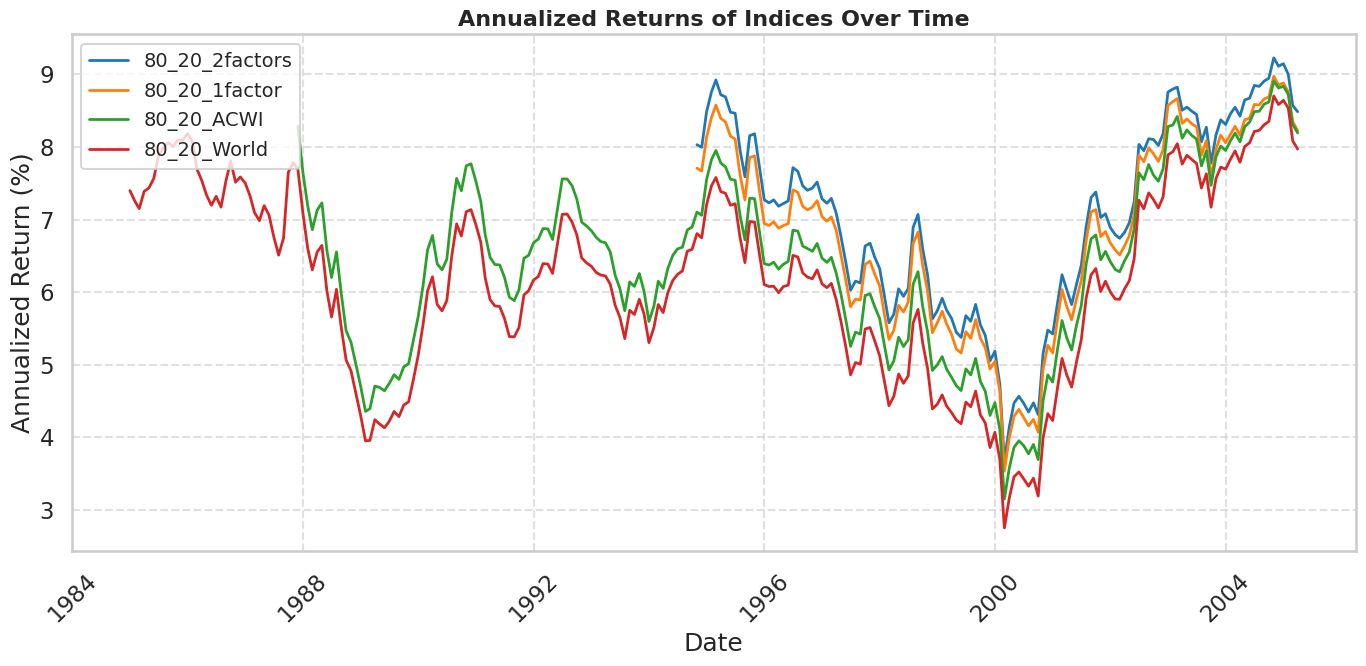

In [7]:
plot_annualized_returns(final_results)